# LangChain: Q&A over Documents

An example might be a tool that would allow you to query a product catalog for items of interest.

In [1]:
#pip install --upgrade langchain

In [2]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [3]:
import os
from openai import AzureOpenAI

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

azure_openai_api_key = os.getenv("AZURE_OPENAI_API_KEY_4")
azure_openai_api_endpoint = os.getenv("AZURE_OPENAI_API_ENDPOINT_4")
deployment_name = os.getenv("AZURE_DEPLOYMENT_NAME_4")


Note: LLM's do not always produce the same results. When executing the code in your notebook, you may get slightly different answers that those in the video.

In [4]:
from langchain.chains import RetrievalQA
from langchain.chat_models import AzureChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown
from langchain.llms import AzureOpenAI

In [5]:
llm = AzureChatOpenAI(api_key=azure_openai_api_key,
                        api_version="2023-12-01-preview",
                        azure_endpoint=azure_openai_api_endpoint,
                        model=deployment_name,
                        temperature=0.9
                        )

C:\Users\luca5\AppData\Local\Temp\ipykernel_21916\1810801969.py:1: LangChainDeprecationWarning: The class `AzureChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import AzureChatOpenAI``.
  llm = AzureChatOpenAI(api_key=azure_openai_api_key,


In [6]:
file = 'OutdoorClothingCatalog_1000.csv'
loader = CSVLoader(file_path=file)

In [7]:
from langchain.indexes import VectorstoreIndexCreator
from langchain.embeddings import AzureOpenAIEmbeddings
from langchain.embeddings import OpenAIEmbeddings

In [8]:
#!pip install docarray

Documentation : https://python.langchain.com/v0.1/docs/modules/data_connection/vectorstores/ 

In [9]:
embedding_model = OpenAIEmbeddings()

# embedding_model = AzureOpenAIEmbeddings(openai_api_key=azure_openai_api_key,
#                                     azure_deployment='text-embedding-ada-002',
#                                     azure_endpoint=azure_openai_api_endpoint,
#                                     openai_api_version="2023-12-01-preview",
#                                     chunk_size=500
# )

index = VectorstoreIndexCreator(
    embedding = embedding_model,
    vectorstore_cls=DocArrayInMemorySearch
).from_loaders([loader])

C:\Users\luca5\AppData\Local\Temp\ipykernel_21916\3687374246.py:1: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embedding_model = OpenAIEmbeddings()
c:\Users\luca5\.conda\envs\GENAI\Lib\site-packages\pydantic\_migration.py:283: UserWarning: `pydantic.error_wrappers:ValidationError` has been moved to `pydantic:ValidationError`.
  warnings.warn(f'`{import_path}` has been moved to `{new_location}`.')


In [10]:
query ="Please list all your shirts mentioning sun protection \
in a table in markdown and summarize each one."

In [11]:
response = index.query(query, 
                       llm = llm)

In [12]:
display(Markdown(response))

Sure! Here's a table summarizing the shirts with sun protection:

```markdown
| Name                                    | Description                                                                                                     |
|-----------------------------------------|-----------------------------------------------------------------------------------------------------------------|
| Men's Tropical Plaid Short-Sleeve Shirt | Lightest hot-weather shirt, UPF 50+, wrinkle-resistant, vented, polyester, two bellows pockets.                 |
| Men's Plaid Tropic Shirt, Short-Sleeve  | Light hot-weather shirt, UPF 50+, wrinkle-free, polyester/nylon blend, vented, two bellows pockets.             |
| Sun Shield Shirt                        | Slightly fitted, UPF 50+, nylon/Lycra, moisture-wicking, abrasion-resistant, recommended by The Skin Cancer Foundation.  |
| Men's TropicVibe Shirt, Short-Sleeve    | Lightweight, UPF 50+, nylon/polyester, wrinkle-resistant, vented, two bellows pockets.                          |
```

Each shirt provides UPF 50+ sun protection, offering coverage from harmful UV rays.

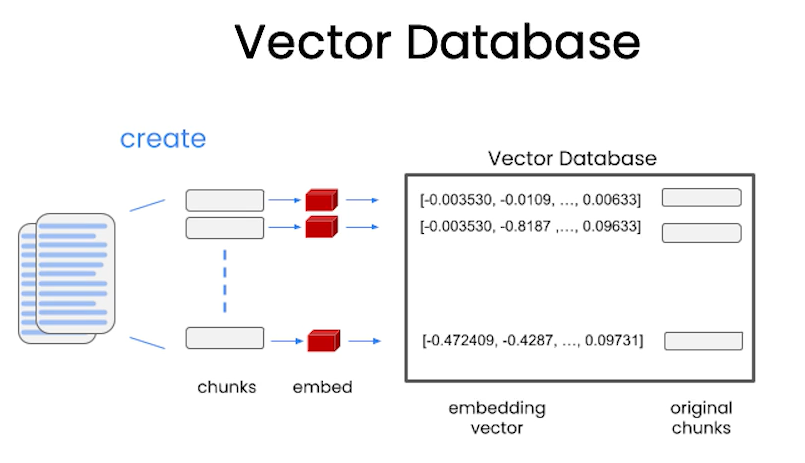

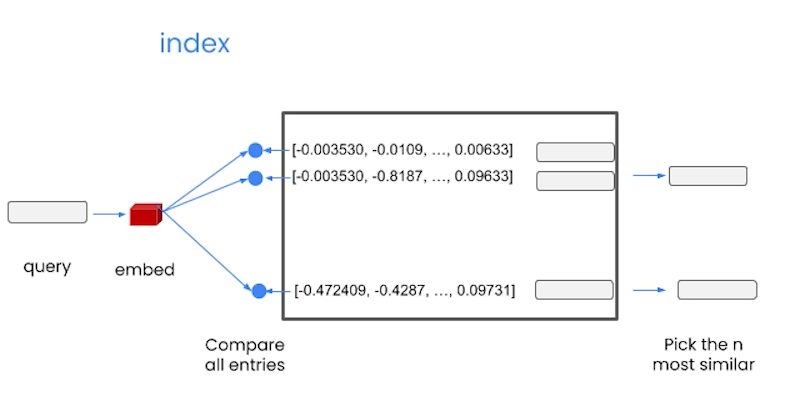

## Step By Step

In [13]:
from langchain.document_loaders import CSVLoader
loader = CSVLoader(file_path=file)

In [14]:
docs = loader.load()

In [15]:
docs[0]

Document(metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 0}, page_content=": 0\nname: Women's Campside Oxfords\ndescription: This ultracomfortable lace-to-toe Oxford boasts a super-soft canvas, thick cushioning, and quality construction for a broken-in feel from the first time you put them on. \n\nSize & Fit: Order regular shoe size. For half sizes not offered, order up to next whole size. \n\nSpecs: Approx. weight: 1 lb.1 oz. per pair. \n\nConstruction: Soft canvas material for a broken-in feel and look. Comfortable EVA innersole with Cleansport NXT® antimicrobial odor control. Vintage hunt, fish and camping motif on innersole. Moderate arch contour of innersole. EVA foam midsole for cushioning and support. Chain-tread-inspired molded rubber outsole with modified chain-tread pattern. Imported. \n\nQuestions? Please contact us for any inquiries.")

In [16]:
from langchain.embeddings import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

In [17]:
embed = embeddings.embed_query("Hi my name is Harrison")

In [18]:
print(len(embed))

3072


In [19]:
print(embed[:5])

[-0.0010000402978490859, 0.02599129190756281, -0.005596323240217257, -0.01887295712275545, 0.006607095982685909]


In [20]:
db = DocArrayInMemorySearch.from_documents(
    docs, 
    embeddings
)

In [21]:
query = "Please suggest a shirt with sunblocking"

In [44]:
docs = db.similarity_search(query, k=20)

In [45]:
len(docs)

20

In [46]:
docs[0]

Document(metadata={'source': 'OutdoorClothingCatalog_1000.csv', 'row': 255}, page_content=': 255\nname: Sun Shield Shirt by\ndescription: "Block the sun, not the fun – our high-performance sun shirt is guaranteed to protect from harmful UV rays. \n\nSize & Fit: Slightly Fitted: Softly shapes the body. Falls at hip.\n\nFabric & Care: 78% nylon, 22% Lycra Xtra Life fiber. UPF 50+ rated – the highest rated sun protection possible. Handwash, line dry.\n\nAdditional Features: Wicks moisture for quick-drying comfort. Fits comfortably over your favorite swimsuit. Abrasion resistant for season after season of wear. Imported.\n\nSun Protection That Won\'t Wear Off\nOur high-performance fabric provides SPF 50+ sun protection, blocking 98% of the sun\'s harmful rays. This fabric is recommended by The Skin Cancer Foundation as an effective UV protectant.')

In [25]:
retriever = db.as_retriever(search_kwargs={"k": 20})

In [26]:
qdocs = "".join([docs[i].page_content for i in range(len(docs))])


In [27]:
response = llm.call_as_llm(f"{qdocs} Question: Please list all \
shirts who mention UPF 50+ sun protection in a table in markdown and summarize each one.") 


C:\Users\luca5\AppData\Local\Temp\ipykernel_21916\3179286117.py:1: LangChainDeprecationWarning: The method `BaseChatModel.call_as_llm` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = llm.call_as_llm(f"{qdocs} Question: Please list all \


In [28]:
display(Markdown(response))

Here's a table summarizing all shirts that mention UPF 50+ sun protection:

| Name                               | Summary                                                                                                                                                                  |
|------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Sun Shield Shirt                   | High-performance sun shirt with UPF 50+ protection. Slightly fitted design, abrasion resistant, moisture-wicking, made from nylon and Lycra. Handwash, line dry.          |
| Men's Tropical Plaid Short-Sleeve Shirt | Lightest hot-weather shirt made of 100% polyester. Traditional fit with front and back venting, wrinkle-resistant, and two front bellows pockets. Machine washable.     |
| Tropical Breeze Shirt              | Lightweight, breathable long-sleeve shirt with SunSmart technology. Originally for fishing, offers UPF 50+ protection, wrinkle-resistant, quick drying, and machine washable. |
| Men's Plaid Tropic Shirt, Short-Sleeve  | Designed for fishing and travel, this shirt offers UPF 50+ protection. Made of polyester and nylon, it features quick-dry, wrinkle-free fabric and front/back cape venting.  |

All these shirts offer the highest level of sun protection, blocking 98% of harmful UV rays.

In [29]:
import langchain
print(langchain.__version__)

0.3.1


In [30]:
qa_stuff = RetrievalQA.from_chain_type(
    llm=llm, 
    chain_type="stuff", 
    retriever=retriever, 
    verbose=True
)

In [31]:
query =  "Please give the id of all the shirts who mention UPF 50+ sun protection"

In [32]:
response = qa_stuff.run(query)



> Entering new RetrievalQA chain...


C:\Users\luca5\AppData\Local\Temp\ipykernel_21916\3485144879.py:1: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = qa_stuff.run(query)



> Finished chain.


In [33]:
display(Markdown(response))

The IDs of shirts that mention UPF 50+ sun protection are:

- 255
- 374
- 618
- 535

In [34]:
response = index.query(query, llm=llm)

## Different way to do it:

With another type of Vector Store, and using a chain defined with LCEL. Adapted from [this documentation](https://python.langchain.com/v0.2/docs/versions/migrating_chains/retrieval_qa/)

In [49]:
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter


data = loader.load()

# Split (not necessary here because we have CSV)
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
# all_splits = text_splitter.split_documents(data)

# Store splits
vectorstore = FAISS.from_documents(documents=data, embedding=OpenAIEmbeddings())


In [50]:
prompt_template = """
You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.

Question: {question} 

Context: {context}

Answer:
"""

In [ ]:
from langchain import hub
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain.prompts import ChatPromptTemplate


prompt = ChatPromptTemplate.from_template(prompt_template)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

qa_chain = (
    {
        "context": vectorstore.as_retriever(search_kwargs={"k": 12}) | format_docs,
        "question": RunnablePassthrough(),
    }
    | prompt
    | llm
    | StrOutputParser()
)

response = qa_chain.invoke("Please list the names of 10 shirts with SPF 50+ sun protection in a table in markdown")

In [58]:
display(Markdown(response))

Here is a table listing 10 shirts with SPF 50+ sun protection:

| Name                                    | Description |
|-----------------------------------------|-------------|
| Men's Tropical Plaid Short-Sleeve Shirt | Lightest hot-weather shirt with UPF 50+ |
| Sun Shield Shirt                        | High-performance sun shirt with UPF 50+ |
| Men's Plaid Tropic Shirt, Short-Sleeve  | Ultracomfortable with UPF 50+ coverage |
| Men's TropicVibe Shirt, Short-Sleeve    | Lightweight feel with UPF 50+ coverage  |
| Girls' Ocean Breeze Long-Sleeve Shirt   | Long-sleeve rash guard with UPF 50+     |
| Girls' Beachside Breeze Shirt, Half-Sleeve | Swim shirt with UPF 50+ protection  |
| Women's Tropical Tee, Sleeveless        | Sleeveless button-up with UPF 50+       |
| Tropical Breeze Shirt                   | Lightweight, breathable with UPF 50+    |
| Sunrise Tee                             | Women's button-down with UPF 50+        |
| Fishing Pro Long-Sleeve Shirt           | Technical fishing shirt with UPF 50+    |